# Test d'analyse graphique

## I - Dataset et librairy

In [126]:
# Importation librairy
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# chargement du fichier csv
dataset = pd.read_csv('dataset.csv')

In [128]:
# afficher les premières lignes du fichier
print(dataset)

  Horodateur              Adresse e-mail     Niveau  Age  Score  Q1/ 1+1  \
0  4/26/2023   carlos11komenan@gmail.com  Licence 1   18  1 / 3        2   
1  4/26/2023    carlos6komenan@gmail.com  Licence 1   23  2 / 3        2   
2  4/26/2023        sschema237@gmail.com     Master   20  3 / 3        2   
3  4/27/2023  stephane.komenan@gmail.com  Licence 3   25  3 / 3        2   
4  4/30/2023    carlos2komenan@gmail.com       BEPC   23  1 / 3        2   

   Q2/ 2*2+1  Q3/ 7*2+4*4     Classement  
0          6           56       Débutant  
1          5           56  Intermédiaire  
2          5           30         Avancé  
3          5           30         Avancé  
4          6           56       Débutant  


## II - Partie graphique

### 1/ Graphique du Classement des individus par rapport à leurs âge

Classement par rapport à l'âge


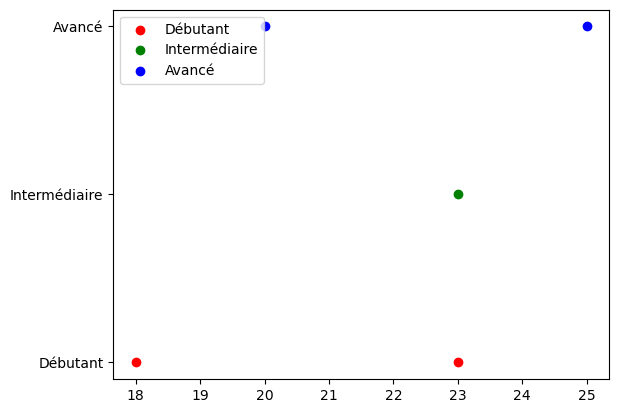

In [129]:
print("Classement par rapport à l'âge")
# Définir un dictionnaire de couleurs pour chaque classe
colors = {'Débutant': 'red', 'Intermédiaire': 'green', 'Avancé': 'blue'}

for classe in dataset['Classement'].unique():
    # extraire les données pour l'espèce actuelle
    subset = dataset[dataset['Classement'] == classe]
    # tracer un graphique de dispersion pour les longueurs et les largeurs des sépales, en colorant les points en fonction de l'espèce
    plt.scatter(subset['Age'], subset['Classement'],color=colors[classe], label=classe )

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

### 2/ Graphique du Classement des individus par rapport à leurs niveau d'étude

Classement par rapport au niveau


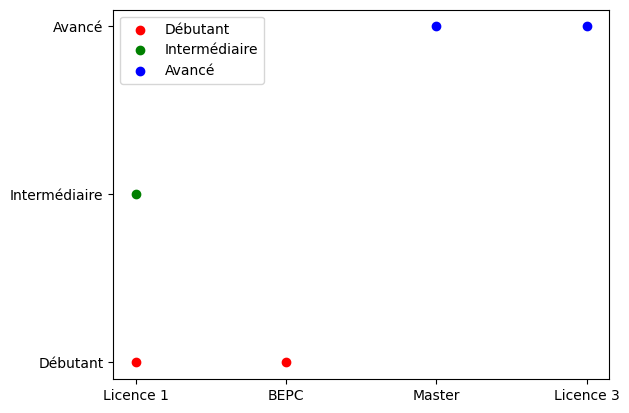

In [130]:
print("Classement par rapport au niveau")
# Définir un dictionnaire de couleurs pour chaque classe
colors = {'Débutant': 'red', 'Intermédiaire': 'green', 'Avancé': 'blue'}

for classe in dataset['Classement'].unique():
    # extraire les données pour l'espèce actuelle
    subset = dataset[dataset['Classement'] == classe]
    # tracer un graphique de dispersion pour les longueurs et les largeurs des sépales, en colorant les points en fonction de l'espèce
    plt.scatter(subset['Niveau'], subset['Classement'],color=colors[classe], label=classe )

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

### 3/ Graphique de la repartition des participants par catégorie de Classement

In [131]:

# Calculer le nombre de participants pour chaque catégorie de classement
n_debutant = debutant.shape[0]
n_intermediaire = intermediaire.shape[0]
n_avance = avance.shape[0]
print("Nombre de débutant : ",n_debutant)
print("Nombre d'intermédiaire : ",n_intermediaire)
print("Nombre d'avancé : ",n_avance)

Nombre de débutant :  2
Nombre d'intermédiaire :  1
Nombre d'avancé :  2


Sur  5  personnes intérogées
Vous trouverez ci-dessous la repartion comme suite


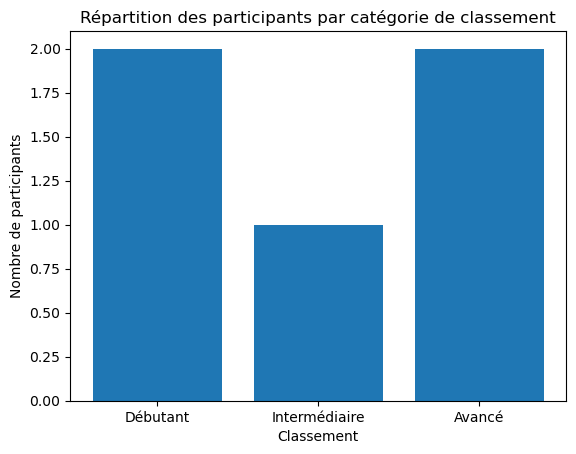

In [132]:
# Créer un tableau de données pour la hauteur des barres
hauteurs = [n_debutant, n_intermediaire, n_avance]

# Créer un tableau pour les noms des catégories de classement
categories = ['Débutant', 'Intermédiaire', 'Avancé']

# Créer un graphique en barres avec la librairie matplotlib
plt.bar(categories, hauteurs)

# Ajouter des labels pour les axes et le titre
plt.xlabel('Classement')
plt.ylabel('Nombre de participants')
plt.title('Répartition des participants par catégorie de classement')

# Afficher le graphique
print("Sur ",sum(hauteurs)," personnes intérogées")
print("Vous trouverez ci-dessous la repartion comme suite")
plt.show()

## III - Etude de corrélation 

### 1/ Matrice de corrélation

In [133]:
# Sélectionner les colonnes contenant les réponses aux questions
questions = ['Q1/ 1+1', 'Q2/ 2*2+1', 'Q3/ 7*2+4*4']

# Convertir les réponses en chaînes de caractères
for question in questions:
    dataset[question] = dataset[question].astype(str)
    # Extraire la réponse à la première partie de la question
    dataset[question] = dataset[question].apply(lambda x: x.split('/')[0])
    # Convertir la réponse en entier
    dataset[question] = dataset[question].astype(int)

# Calculer la matrice de corrélation
corr_matrix = dataset[questions].corr()

In [134]:
# Afficher la matrice de corrélation
print(corr_matrix)

             Q1/ 1+1  Q2/ 2*2+1  Q3/ 7*2+4*4
Q1/ 1+1          NaN        NaN          NaN
Q2/ 2*2+1        NaN   1.000000     0.666667
Q3/ 7*2+4*4      NaN   0.666667     1.000000


### 2/ Graphique de la matrice de corrélation

<Axes: >

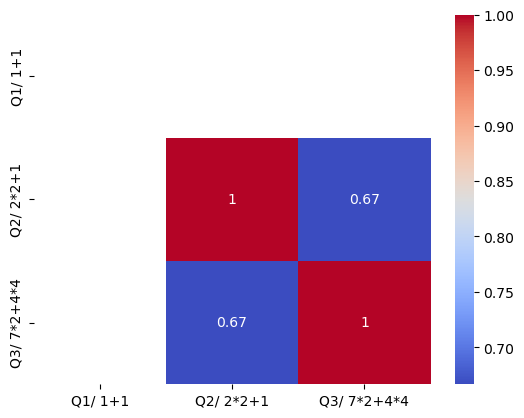

In [119]:
# tracer le graphique de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')